In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.feature_extraction import image
from sklearn.manifold import TSNE

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [19]:
path2csv = './SCUT-FBP5500_v2/All_Ratings.xlsx'
df = pd.read_excel(path2csv)
df.tail()

,Rater,Filename,Rating,original Rating
329995,60,AM995.jpg,2,NaN
329996,60,AM996.jpg,2,NaN
329997,60,AM997.jpg,3,NaN
329998,60,AM998.jpg,3,NaN
329999,60,AM999.jpg,2,NaN


In [28]:
x_train = df[df['Filename'].str.contains('CF')]
cond = x_train['Rater'] == 1
x_train = x_train[cond]
x_train.reset_index(inplace=True, drop=True)
x_train

,Rater,Filename,Rating,original Rating
0,1,CF1.jpg,3,NaN
1,1,CF10.jpg,3,NaN
2,1,CF100.jpg,1,NaN
3,1,CF101.jpg,2,NaN
4,1,CF102.jpg,3,NaN
...,...,...,...,...
745,1,CF95.jpg,2,NaN
746,1,CF96.jpg,2,NaN
747,1,CF97.jpg,2,NaN
748,1,CF98.jpg,2,NaN


In [29]:
img_name = list(x_train.iloc[:,1])
img_name[:3]

['CF1.jpg', 'CF10.jpg', 'CF100.jpg']

In [30]:
data = []

for filename in tqdm(img_name):
    image = cv2.imread("./SCUT-FBP5500_v2/Images/"+filename)
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (45,45))
        image = image.flatten()
        data.append([image, "./SCUT-FBP5500_v2/Images/"+filename])

100%|████████████████████████████████████████| 750/750 [00:01<00:00, 398.63it/s]


In [31]:
features, images  = zip(*data)

In [32]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=100)
pca.fit(features)
pca_features = pca.transform(features)

In [33]:
num_images_to_plot = len(images)

if len(images) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(images)), num_images_to_plot))
    images = [images[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [34]:
X = np.array(pca_features)
tsne = TSNE(n_components=2, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 750 samples in 0.000s...
[t-SNE] Computed neighbors for 750 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 750 / 750
[t-SNE] Mean sigma: 741.214920
[t-SNE] Computed conditional probabilities in 0.059s
[t-SNE] Iteration 50: error = 67.6000443, gradient norm = 0.3962175 (50 iterations in 1.391s)
[t-SNE] Iteration 100: error = 68.8349609, gradient norm = 0.3749018 (50 iterations in 1.387s)
[t-SNE] Iteration 150: error = 69.4118652, gradient norm = 0.3766393 (50 iterations in 1.403s)
[t-SNE] Iteration 200: error = 69.0224304, gradient norm = 0.3777616 (50 iterations in 1.382s)
[t-SNE] Iteration 250: error = 69.5995483, gradient norm = 0.3791600 (50 iterations in 1.384s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.599548
[t-SNE] Iteration 300: error = 0.9427778, gradient norm = 0.0029496 (50 iterations in 1.320s)
[t-SNE] Iteration 350: error = 0.8997397, gradient norm = 0.0002855

In [35]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

## Plots the clusters

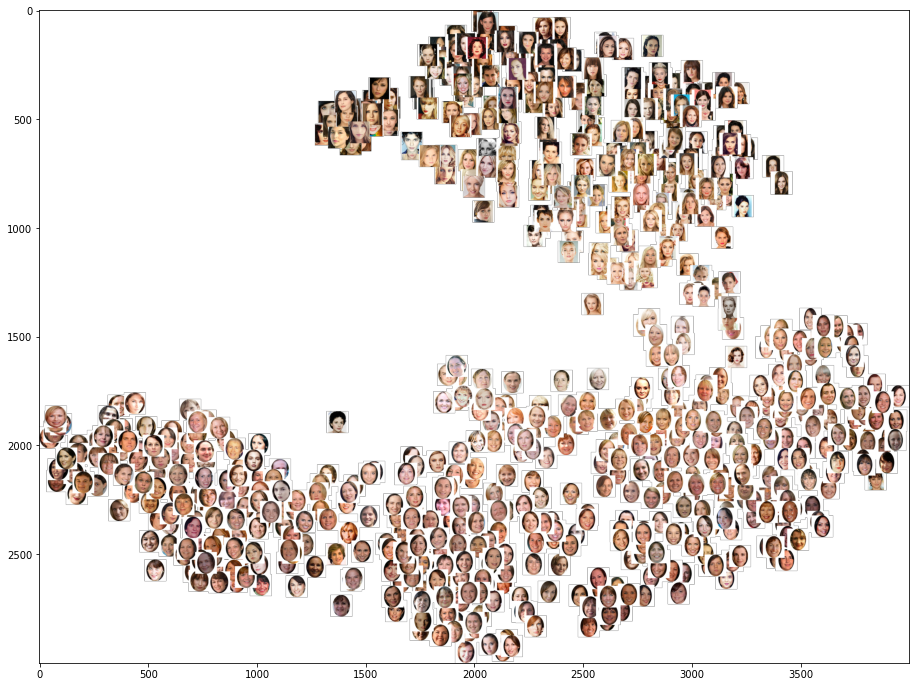

In [36]:
import matplotlib.pyplot
from matplotlib.pyplot import imshow
from PIL import Image

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [18]:
# save json, png
"""
import os
import json

full_image.save("../data/test_tSNE.png")

tsne_path = "../data/test_tSNE.json"

data = [{"path":os.path.abspath(img), "point":[float(x), float(y)]} for img, x, y in zip(images, tx, ty)]
with open(tsne_path, 'w') as outfile:
    json.dump(data, outfile)

print("saved t-SNE result to %s" % tsne_path)"""

'\nimport os\nimport json\n\nfull_image.save("../data/test_tSNE.png")\n\ntsne_path = "../data/test_tSNE.json"\n\ndata = [{"path":os.path.abspath(img), "point":[float(x), float(y)]} for img, x, y in zip(images, tx, ty)]\nwith open(tsne_path, \'w\') as outfile:\n    json.dump(data, outfile)\n\nprint("saved t-SNE result to %s" % tsne_path)'